In [1]:
from google.colab import files
data = files.upload()
# "genre_lyrics_data.csv"

In [2]:
import pandas as pd
df = pd.read_csv("genre_lyrics_data.csv")

In [3]:
df = df[["genre_name","lyrics_cleaned"]]
df.rename(columns={"lyrics_cleaned":"lyrics"},inplace=True)
df.head()

,genre_name,lyrics
0,acoustic,well you done done me and you bet i felt it i ...
1,acoustic,head under water and they tell me to breathe e...
2,acoustic,will you count me in ive been awake for a whil...
3,acoustic,do you hear me im talking to you across the wa...
4,acoustic,the strands in your eyes that color them wonde...


In [5]:
from io import StringIO
df['category_id'] = df["genre_name"].factorize()[0]
category_to_id = df[['genre_name','category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_to_id[['category_id', 'genre_name']].values)
df.head()

,genre_name,lyrics,category_id
0,acoustic,well you done done me and you bet i felt it i ...,0
1,acoustic,head under water and they tell me to breathe e...,0
2,acoustic,will you count me in ive been awake for a whil...,0
3,acoustic,do you hear me im talking to you across the wa...,0
4,acoustic,the strands in your eyes that color them wonde...,0


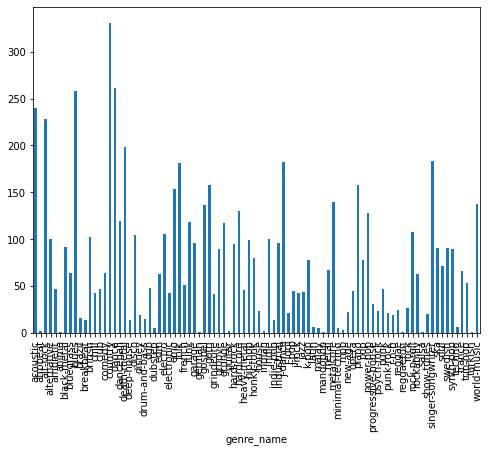

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('genre_name').lyrics.count().plot.bar(ylim=0)
plt.show()

In [7]:
genre_size = df.groupby('genre_name').lyrics.count()

In [8]:
genre_size.sort_values(ascending=False).head(30)

genre_name
country              331
dance                261
blues                258
acoustic             240
alt-rock             228
death-metal          198
singer-songwriter    183
j-dance              182
folk                 181
piano                158
goth                 158
emo                  154
metalcore            140
world-music          138
gospel               137
hardcore             130
power-pop            128
dancehall            119
funk                 118
grunge               117
rock-n-roll          108
electro              106
disco                105
british              102
indie                100
alternative          100
hip-hop               99
industrial            96
garage                96
hard-rock             95
Name: lyrics, dtype: int64

In [9]:
top_30 = list(genre_size.head(30).index)
top_30_df = df.loc[df['genre_name'].isin(top_30)]
len(top_30_df)
df = top_30_df.copy()

category_to_id = df[['genre_name','category_id']].drop_duplicates().sort_values('category_id')
id_to_category = dict(category_to_id[['category_id', 'genre_name']].values)

In [10]:
len(id_to_category)

30

In [11]:
len(df.genre_name.unique())

30

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.lyrics).toarray()
labels = df.category_id
features.shape

(2980, 7413)

In [ ]:
# from sklearn.feature_selection import chi2
# import numpy as np
# N = 2
# for genre, category_id in sorted(category_to_id.items()):
#   features_chi2 = chi2(features, labels == category_id)
#   indices = np.argsort(features_chi2[0])
#   feature_names = np.array(tfidf.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   print("# '{}':".format(genre))
#   print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#   print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(df['lyrics'], df['genre_name'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
# count = 0
# test_str = ''
# for x in X_test:
#   if count <= 1:
#     test_str = x
#     print(x)
#     count += 1
#   else:
#     break

In [ ]:
# print(clf.predict(count_vect.transform([test_str])))

In [ ]:
# df[df['lyrics'] == test_str]

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to conver

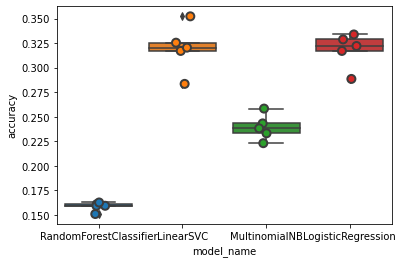

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [26]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.319799
LogisticRegression        0.318121
MultinomialNB             0.239262
RandomForestClassifier    0.158725
Name: accuracy, dtype: float64

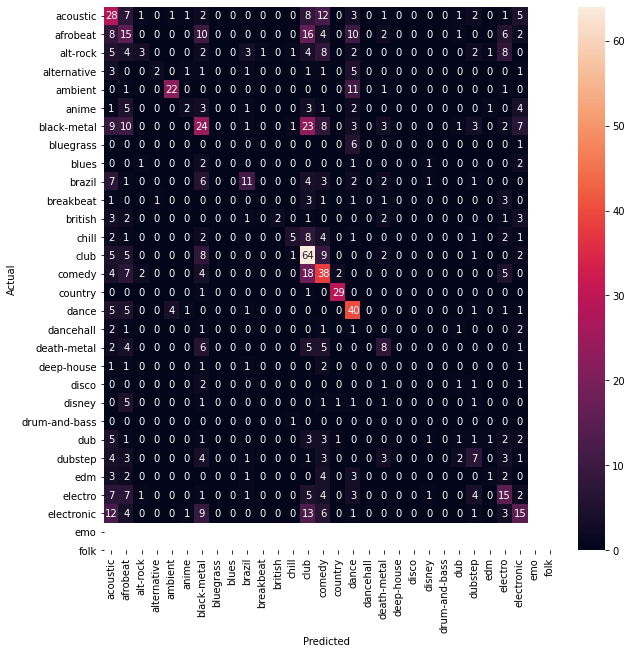

In [22]:
plt.close()
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_to_id.genre_name.values, yticklabels=category_to_id.genre_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# import pickle
# # save the model to disk
# filename = 'full_genre_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [23]:
import pickle
# save the model to disk
filename = 'top30_genre_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [24]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.33739837398373984
